In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO


In [2]:
#importo el csv con los datos poblacionales de la comunidad de Madrid
poblacion_cm = pd.read_csv('https://portalestadistico.com/municipioencifras/proceso_descarga_excel_csv.aspx?pn=madrid&pc=ZTV21&idp=&Id_Celda_Fila_Plantilla=8354&Id_Territorio=28079&Id_Territorio_Padre=CCA13&idioma=1&Tipo_Fichero_Generado=excel', encoding='latin1')

In [3]:
poblacion_cm

,"<table><tr><td><img src='https://portalestadistico.com/municipioencifras/plantillas/logo_28079.png'/><br><br><br><br></td></tr></table><table><tr><td colspan=""3"">El municipio en cifras</td></tr><tr><td colspan=""3"">Población</td></tr><tr><td colspan=""3""></td></tr><table><tr><td>Año</td><td>Periodos</td><td>Madrid</td>"
0,</tr><tr><td>1987</td><td>Anual</td><td>310050...
1,</tr><tr><td>1988</td><td>Anual</td><td>310284...
2,</tr><tr><td>1989</td><td>Anual</td><td>310846...
3,</tr><tr><td>1990</td><td>Anual</td><td>312073...
4,</tr><tr><td>1991</td><td>Anual</td><td>301049...
5,</tr><tr><td>1992</td><td>Anual</td><td>301743...
6,</tr><tr><td>1993</td><td>Anual</td><td>303797...
7,</tr><tr><td>1994</td><td>Anual</td><td>304110...
8,</tr><tr><td>1995</td><td>Anual</td><td>302973...
9,</tr><tr><td>1996</td><td>Anual</td><td>286685...


In [4]:
poblacion_cm.columns

Index(['<table><tr><td><img src='https://portalestadistico.com/municipioencifras/plantillas/logo_28079.png'/><br><br><br><br></td></tr></table><table><tr><td colspan="3">El municipio en cifras</td></tr><tr><td colspan="3">Población</td></tr><tr><td colspan="3"></td></tr><table><tr><td>Año</td><td>Periodos</td><td>Madrid</td>'], dtype='object')

In [5]:
columnas = poblacion_cm.columns.tolist() #almaceno en una variable una lista con las columnas
columnas[0] = 'Periodo' #le cambio el nombre a la primera columna de la lista
poblacion_cm.columns = columnas #copio al df la lista con los nuevos nombres de columnas

In [6]:
poblacion_cm['Periodo'] = poblacion_cm['Periodo'].str.replace(r'<.*?>', '', regex=True)#elimino todo lo que se encuentre entre <>

In [7]:
poblacion_cm

,Periodo
0,1987Anual3100507
1,1988Anual3102846
2,1989Anual3108463
3,1990Anual3120733
4,1991Anual3010492
5,1992Anual3017439
6,1993Anual3037977
7,1994Anual3041101
8,1995Anual3029734
9,1996Anual2866850


In [8]:
poblacion_cm['Periodo'] = poblacion_cm['Periodo'].str.replace('Anual', ' ') #elimino Anual de todas las filas y la sustituyo por un espacio

In [9]:
poblacion_cm['Poblacion'] = '' #añado una nueva columna con nombre Poblacion

In [10]:
poblacion_cm = poblacion_cm.drop(poblacion_cm.index[0:28]) #elimino las filas del 0 al 27 pues me interesa visualizar desde el año 2015

In [11]:
poblacion_cm['Poblacion'] = poblacion_cm['Periodo'].str.split().str[1] #copio los valores situados en indice 1 a la columna periodo a la columna poblacion
poblacion_cm['Periodo'] = poblacion_cm['Periodo'].str.split().str[0] #los valores de la columna periodo son solo los que estan donde idice 0

In [12]:
poblacion_cm = poblacion_cm.drop(36) #elimino NaN

In [13]:
poblacion_cm['Poblacion'] = poblacion_cm['Poblacion'].astype(int) #transformo en int los valores de la columna

In [14]:
poblacion_cm = poblacion_cm.set_index('Periodo') #convierto la columna Periodo en indice del df

In [15]:
poblacion_cm

,Poblacion
Periodo,
2015,3141991
2016,3165883
2017,3182175
2018,3221824
2019,3266126
2020,3334730
2021,3312310
2022,3286662


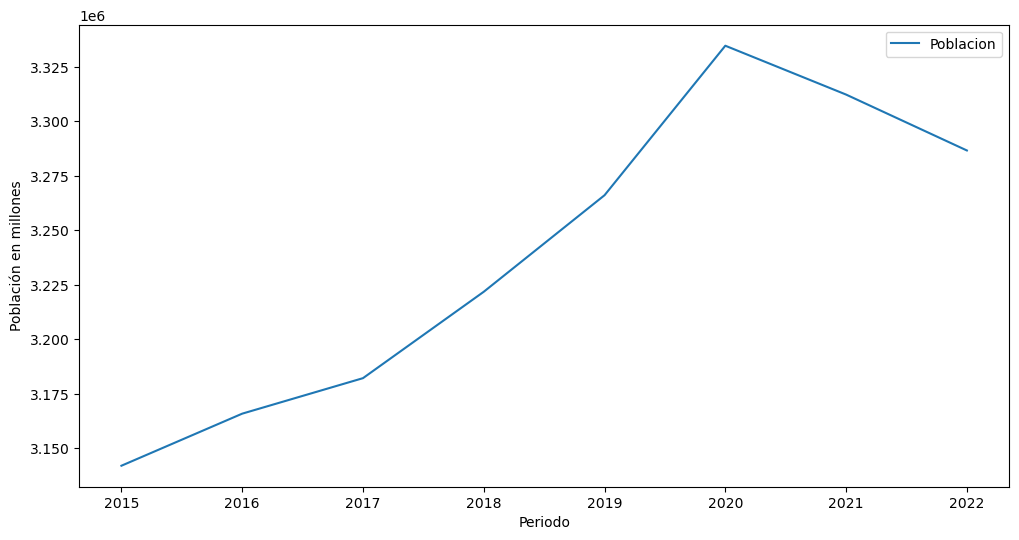

In [16]:
poblacion_cm[['Poblacion']].plot(kind='line', figsize=(12, 6))
plt.ylabel('Población en millones')
plt.show()

In [21]:
poblacion_cyl = pd.read_csv('/Users/davidledo/Desktop/Proyectos/w4-project_ETL/data/evolucion_de_la_poblacion_en_castilla_y_leon.csv') #cargo el csv

In [22]:
poblacion_cyl

,"Año;""Periodo"";""Castilla y León﻿ """
0,"2002;""Semestre 1"";""2.454.840"""
1,"2002;""Semestre 2"";""2.458.042"""
2,"2003;""Semestre 1"";""2.463.623"""
3,"2003;""Semestre 2"";""2.467.429"""
4,"2004;""Semestre 1"";""2.471.114"""
5,"2004;""Semestre 2"";""2.475.274"""
6,"2005;""Semestre 1"";""2.482.805"""
7,"2005;""Semestre 2"";""2.487.533"""
8,"2006;""Semestre 1"";""2.494.676"""
9,"2006;""Semestre 2"";""2.502.598"""


In [23]:
poblacion_cyl = poblacion_cyl.drop(range(42, 56)) #elimino las filas

In [24]:
poblacion_cyl.columns.tolist()

['Año;"Periodo";"Castilla y León\ufeff "']

In [25]:
poblacion_cyl = poblacion_cyl['Año;"Periodo";"Castilla y León\ufeff "'].str.split(';', expand=True) #divido las columnas 

In [26]:
poblacion_cyl = poblacion_cyl.drop(poblacion_cyl.columns[1], axis=1) #elimino la columna 1

In [27]:
poblacion_cyl = poblacion_cyl.drop(poblacion_cyl.index[0:26]) #elimino las filas pues solo me interesan los datos a partir del 2015

In [28]:
poblacion_cyl

,0,2
26,2015,"""2.478.079"""
27,2015,"""2.464.417"""
28,2016,"""2.454.454"""
29,2016,"""2.444.061"""
30,2017,"""2.435.867"""
31,2017,"""2.423.340"""
32,2018,"""2.418.556"""
33,2018,"""2.410.369"""
34,2019,"""2.407.733"""
35,2019,"""2.402.729"""


In [29]:
new_column_names = ['Periodo', 'Poblacion'] #creo una lista con los nombres de las nuevas columnas
poblacion_cyl.rename(columns=dict(zip(poblacion_cyl.columns, new_column_names)), inplace=True) #renombro las columnas con la lista 

In [30]:
poblacion_cyl = poblacion_cyl.iloc[1::2] #elimino las filas pares

In [31]:
poblacion_cyl = poblacion_cyl.set_index('Periodo') #transformo en indice la columna Periodo

In [32]:
poblacion_cyl['Poblacion'] = poblacion_cyl['Poblacion'].str.replace(r'\D', '') #elimino los puntos de la columna poblacion

/var/folders/c4/q4g9gfss40b99pgtrgdmszbh0000gn/T/ipykernel_11170/724317860.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  poblacion_cyl['Poblacion'] = poblacion_cyl['Poblacion'].str.replace(r'\D', '') #elimino los puntos de la columna poblacion


In [33]:
poblacion_cyl['Poblacion'] = poblacion_cyl['Poblacion'].astype(int) #trasformo en integers los valores de la columna

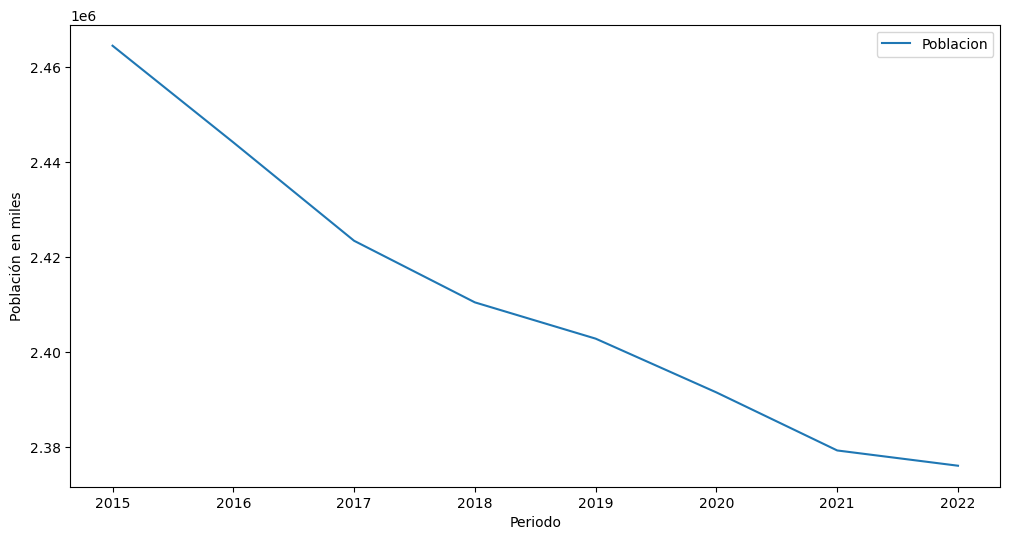

In [34]:
poblacion_cyl[['Poblacion']].plot(kind='line', figsize=(12, 6))
plt.ylabel('Población en miles')
plt.show()

In [35]:
df = pd.concat([poblacion_cm, poblacion_cyl], keys=['poblacion_cm', 'poblacion_cyl'])

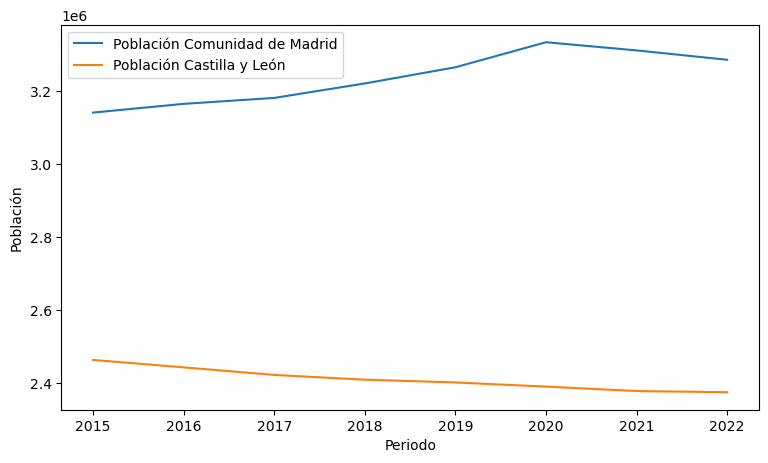

In [37]:
fig, ax = plt.subplots(figsize=(9, 5))

poblacion_cm[['Poblacion']].plot(kind='line', ax=ax)
poblacion_cyl[['Poblacion']].plot(kind='line', ax=ax)

ax.set_ylabel('Población')
ax.legend(['Población Comunidad de Madrid', 'Población Castilla y León'])

plt.show()

## Carga en MongoDB

In [41]:
from pymongo import MongoClient

In [42]:
MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

str_conn = 'mongodb://localhost:27017'   # str_con por defecto

cursor = MongoClient(str_conn)

cursor

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [43]:
db = cursor.dumping_mad

In [44]:
colec = db.n_colec

In [45]:
db.list_collection_names()

['n_colec']

In [46]:
poblacion_cyl_dict = poblacion_cyl.to_dict(orient='list')

In [47]:
poblacion_cm_dict = poblacion_cm.to_dict(orient='list')

In [48]:
colec.insert_one(poblacion_cyl_dict)

In [49]:
colec.insert_one(poblacion_cm_dict)